# Illustrating Increase in Monte Carlo Samples

using Monte Carlo approximation needs an ever increasing number of samples to generate a good approximation. Further the estimator has a constant convergence of $\mathcal{O}(\sqrt{N})$ in any dimension. 

The to be integrated function is the one dimensional $f(x) = \exp^x$, i.e.

$$
    I = \int_0^1 \exp^x dx \approx \frac{1}{N} \sum^N_i f(x_i)
$$

We know $I = 1.718281828459045$.

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def f(x):
    """The function to be intrgrated. """
    return np.exp(x)

# ground truth
I = 1.718281828459045

In [71]:
num_samples = np.array([10, 100, 1000, 10000, 100000, 1000000])
integral_approximations = np.zeros(num_samples.__len__())  # allocate memory 
rmse_approximations = np.zeros(num_samples.__len__())  # allocate memory 

## Compute approximations

In [72]:
for i,n in enumerate(num_samples):
    samples = np.random.rand(n)
    evals = f(samples)
    integral_approximations[i] = evals.mean()
    rmse_approximations[i] = evals.std() / np.sqrt(n)

## Plot results vs. exact solution 

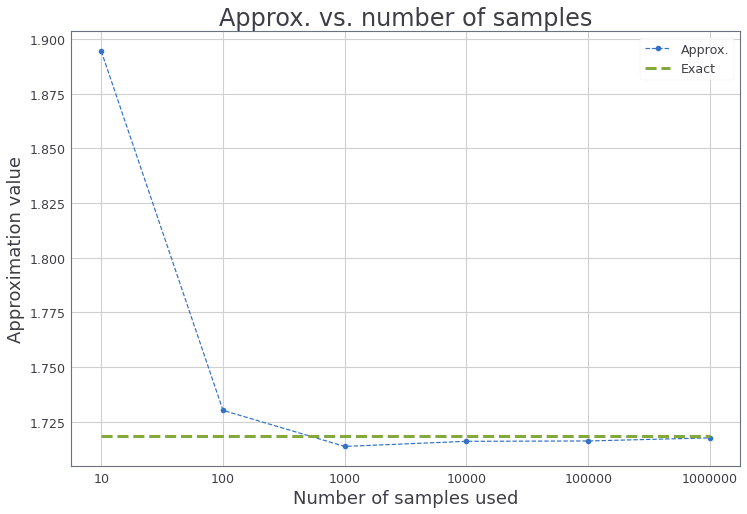

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(num_samples.__len__()), integral_approximations, "o--", label="Approx.")
ax1.plot(np.arange(num_samples.__len__()), np.ones(num_samples.__len__()) * I, "--", linewidth=3.0, label="Exact")

ax1.set_xticks(np.arange(num_samples.__len__()))
ax1.set_xticklabels(num_samples)

ax1.set_xlabel("Number of samples used", fontsize=18)
ax1.set_ylabel("Approximation value", fontsize=18)
ax1.set_title("Approx. vs. number of samples", fontsize=24)
ax1.legend()

plt.savefig("./outputs/mc_approx_vs_samples.png", dpi=300, bbox_inches="tight")
plt.show()

## Estimated RMSE

estimated via $\frac{\hat{\sigma}}{\sqrt{N}}$

In [73]:
for i,val in enumerate(rmse_approximations):
    print(f"{val:.5f}")

0.18138
0.04801
0.01544
0.00495
0.00156
0.00049


In [75]:
for n in num_samples:
    print(1 / np.sqrt(n))

0.31622776601683794
0.1
0.03162277660168379
0.01
0.003162277660168379
0.001
